In [1]:
# Task 1: Load and Explore the Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
try:
    admissions = pd.read_csv(r'F:\OneDrive\Projects\Classes\Power Learn Project\code\pyhton_plp\week7_basic_data_analysis\data_sets\hospital_db - admissions.csv')
    discharges = pd.read_csv(r'F:\OneDrive\Projects\Classes\Power Learn Project\code\pyhton_plp\week7_basic_data_analysis\data_sets\hospital_db - discharges.csv')
    patients = pd.read_csv(r'F:\OneDrive\Projects\Classes\Power Learn Project\code\pyhton_plp\week7_basic_data_analysis\data_sets\hospital_db - patients.csv')
    visits = pd.read_csv(r'F:\OneDrive\Projects\Classes\Power Learn Project\code\pyhton_plp\week7_basic_data_analysis\data_sets\hospital_db - visits.csv')    
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

In [3]:
# Inspect data
print(admissions.head())
print(admissions.info())
print(admissions.isnull().sum())

   admission_id  patient_id admission_date           service primary_diagnosis
0             1           9     2018-01-01        Cardiology               AMI
1             2          30     2018-01-02  General Medicine            Stroke
2             3          49     2018-01-03  General Medicine            Stroke
3             4          70     2018-01-04  General Medicine            Stroke
4             5          87     2018-01-05  General Medicine            Stroke
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   admission_id       720 non-null    int64 
 1   patient_id         720 non-null    int64 
 2   admission_date     720 non-null    object
 3   service            720 non-null    object
 4   primary_diagnosis  720 non-null    object
dtypes: int64(2), object(3)
memory usage: 28.3+ KB
None
admission_id         0
patient_id    

In [4]:
# Clean missing data using forward fill
admissions = admissions.ffill()

In [5]:
# Task 2: Basic Data Analysis
# Example: Descriptive statistics for the admissions dataset
print(admissions.describe())

       admission_id  patient_id
count    720.000000  720.000000
mean     360.500000  366.158333
std      207.990384  218.223501
min        1.000000    1.000000
25%      180.750000  175.750000
50%      360.500000  353.500000
75%      540.250000  557.250000
max      720.000000  742.000000


In [6]:
# Example: Group by gender and compute average age
patients['age'] = pd.to_datetime('2019-01-01') - pd.to_datetime(patients['date_of_birth'])
patients['age'] = patients['age'].dt.days // 365
grouped_data = patients.groupby('gender')['age'].mean()
print(grouped_data)

gender
Female    44.958333
Male      45.096834
Name: age, dtype: float64


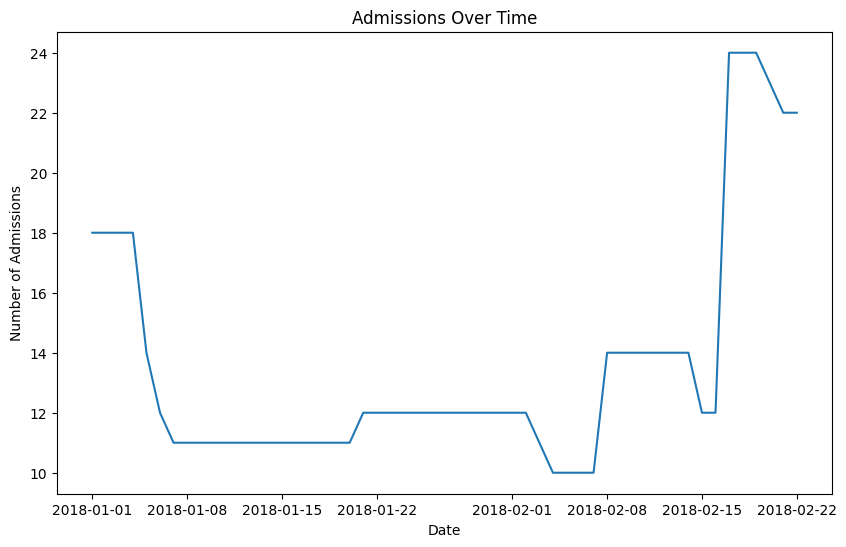

In [7]:
# Task 3: Data Visualization
# Line Chart: Admissions over time
admissions['admission_date'] = pd.to_datetime(admissions['admission_date'])
admissions_by_date = admissions.groupby('admission_date').size()
plt.figure(figsize=(10, 6))
plt.plot(admissions_by_date)
plt.title('Admissions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Admissions')
plt.show()

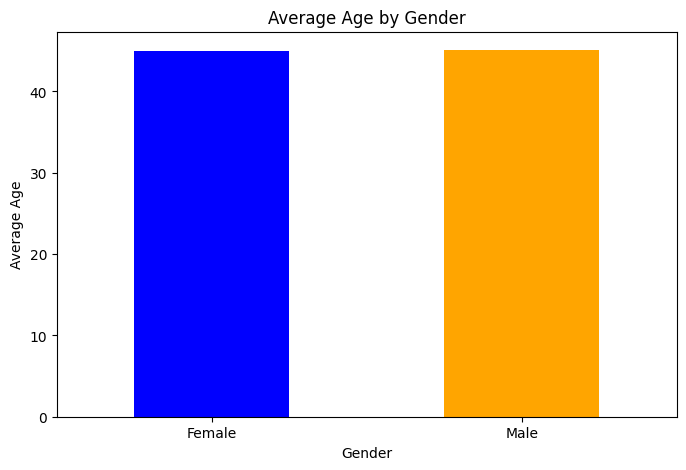

In [8]:
# Bar Chart: Average age by gender
plt.figure(figsize=(8, 5))
grouped_data.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.xticks(rotation=0)
plt.show()

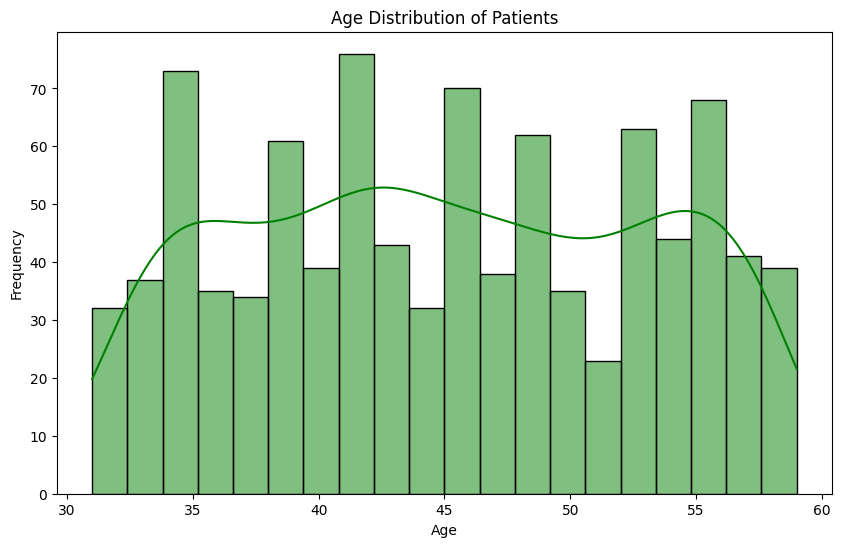

In [9]:
# Histogram: Age distribution of patients
plt.figure(figsize=(10, 6))
sns.histplot(patients['age'], bins=20, kde=True, color='green')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

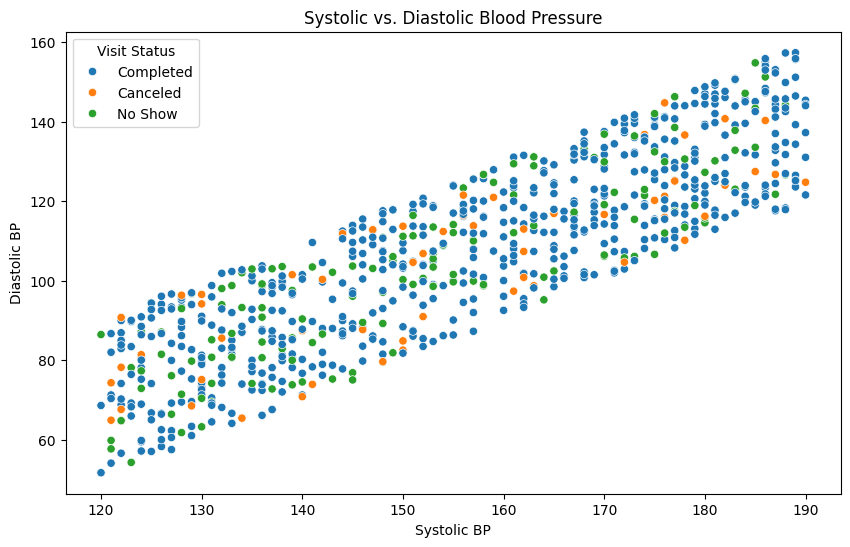

In [10]:
# Scatter Plot: Systolic vs. Diastolic Blood Pressure
plt.figure(figsize=(10, 6))
sns.scatterplot(x='blood_pressure_systolic', y='blood_pressure_diastolic', data=visits, hue='visit_status')
plt.title('Systolic vs. Diastolic Blood Pressure')
plt.xlabel('Systolic BP')
plt.ylabel('Diastolic BP')
plt.legend(title='Visit Status')
plt.show()